In [1]:
# Importing necessary libraries and handling missing packages
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    from sklearn.metrics import r2_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    from statsmodels.stats.outliers_influence import variance_inflation_factor
except ImportError:
    # If any package is not installed, install it
    !pip install pandas numpy matplotlib seaborn statsmodels scikit-learn
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    from sklearn.metrics import r2_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignoring warning messages to maintain clean output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV file into a pandas DataFrame
data = pd.read_csv('day.csv')

# Dropping unnecessary columns from the DataFrame
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Displaying the first 10 rows of the DataFrame
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [3]:
# Displaying information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [4]:
# Calculating & Displaying the percentage of missing values in each column
data.isnull().mean() * 100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [5]:
# Iterate over each column in the DataFrame
for column in data.columns:
    # Get unique values for the current column
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values for column '{column}': {unique_values}")


Unique values for column 'season': [1 2 3 4]
Unique values for column 'yr': [0 1]
Unique values for column 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values for column 'holiday': [0 1]
Unique values for column 'weekday': [6 0 1 2 3 4 5]
Unique values for column 'workingday': [0 1]
Unique values for column 'weathersit': [2 1 3]
Unique values for column 'temp': [14.110847  14.902598   8.050924   8.2        9.305237   8.378268
  8.057402   6.765      5.671653   6.184153   6.932731   7.081807
  6.59567    9.566653   9.498347   7.209153   8.883347  11.979134
 10.728347   7.2775     2.4243464  3.9573897  3.9930433  9.162598
  8.9175     7.995      8.342598   8.877402   7.414153   7.879134
 10.66       7.665237   8.663464  11.719153  11.138347   9.054153
  5.526103   5.918268   7.752731   9.1225    12.977402  17.015
 10.909567  13.048701  17.869153  21.388347  16.365847  11.693897
 12.436653   7.471102   9.091299  12.121732  14.938268  11.5825
 14.082598  16.698193  10.933347  13.73

In [6]:
# List of categorical columns
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday']

# List of numerical columns
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [7]:
# Create a copy of the original DataFrame
data_mapped = data.copy()

# Define mapping dictionaries for categorical variables
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
year_map = {0: 2018, 1: 2019}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
holiday_map = {0: 'No Holiday', 1: 'Holiday'}
weekday_map = {0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday'}
workingday_map = {0: 'No Working Day', 1: 'Working Day'}
weathersit_map = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain'}

# Replace encoded values with mapped values
data_mapped['season'] = data_mapped['season'].replace(season_map)
data_mapped['mnth'] = data_mapped['mnth'].replace(month_map)
data_mapped['yr'] = data_mapped['yr'].replace(year_map)
data_mapped['holiday'] = data_mapped['holiday'].replace(holiday_map)
data_mapped['weekday'] = data_mapped['weekday'].replace(weekday_map)
data_mapped['workingday'] = data_mapped['workingday'].replace(workingday_map)
data_mapped['weathersit'] = data_mapped['weathersit'].replace(weathersit_map)

# Print the updated DataFrame
print(data_mapped)


     season    yr      mnth     holiday    weekday      workingday weathersit  \
0    spring  2018   January  No Holiday     Monday  No Working Day     Cloudy   
1    spring  2018   January  No Holiday    Tuesday  No Working Day     Cloudy   
2    spring  2018   January  No Holiday  Wednesday     Working Day      Clear   
3    spring  2018   January  No Holiday   Thursday     Working Day      Clear   
4    spring  2018   January  No Holiday     Friday     Working Day      Clear   
..      ...   ...       ...         ...        ...             ...        ...   
725  spring  2019  December  No Holiday   Saturday     Working Day     Cloudy   
726  spring  2019  December  No Holiday     Sunday     Working Day     Cloudy   
727  spring  2019  December  No Holiday     Monday  No Working Day     Cloudy   
728  spring  2019  December  No Holiday    Tuesday  No Working Day      Clear   
729  spring  2019  December  No Holiday  Wednesday     Working Day     Cloudy   

          temp     atemp   

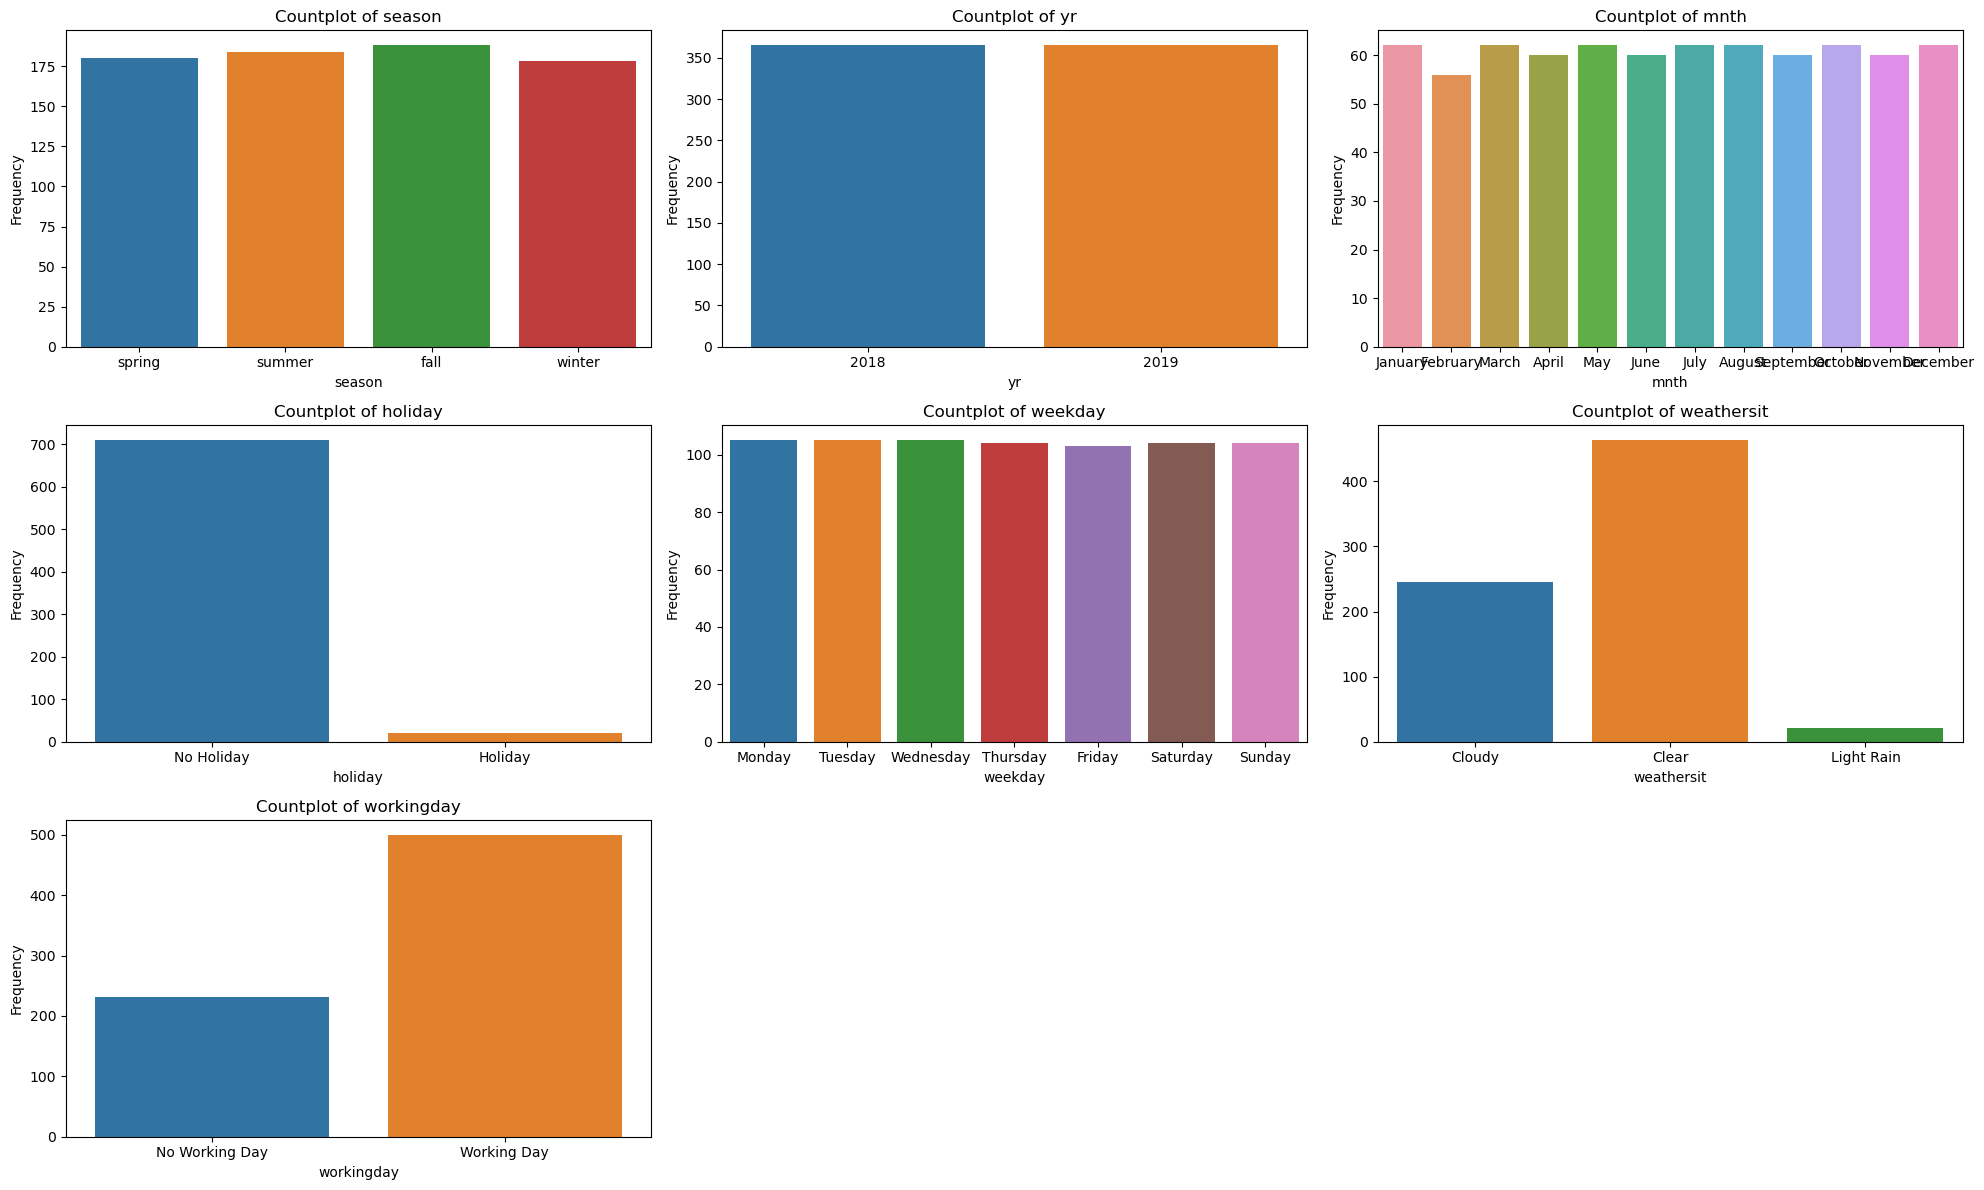

In [8]:
## Univariate Analysis for Categorical Columns

# Convert 'yr' column to string type
data_mapped['yr'] = data_mapped['yr'].astype(str)

# Calculate number of columns and rows for subplots
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each categorical column
for idx, cat in enumerate(cat_cols):
    # Plot countplot for the current categorical column
    sns.countplot(x=data_mapped[cat], ax=axes[idx])
    axes[idx].set_xlabel(cat)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Countplot of {cat}')

# Remove any empty subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

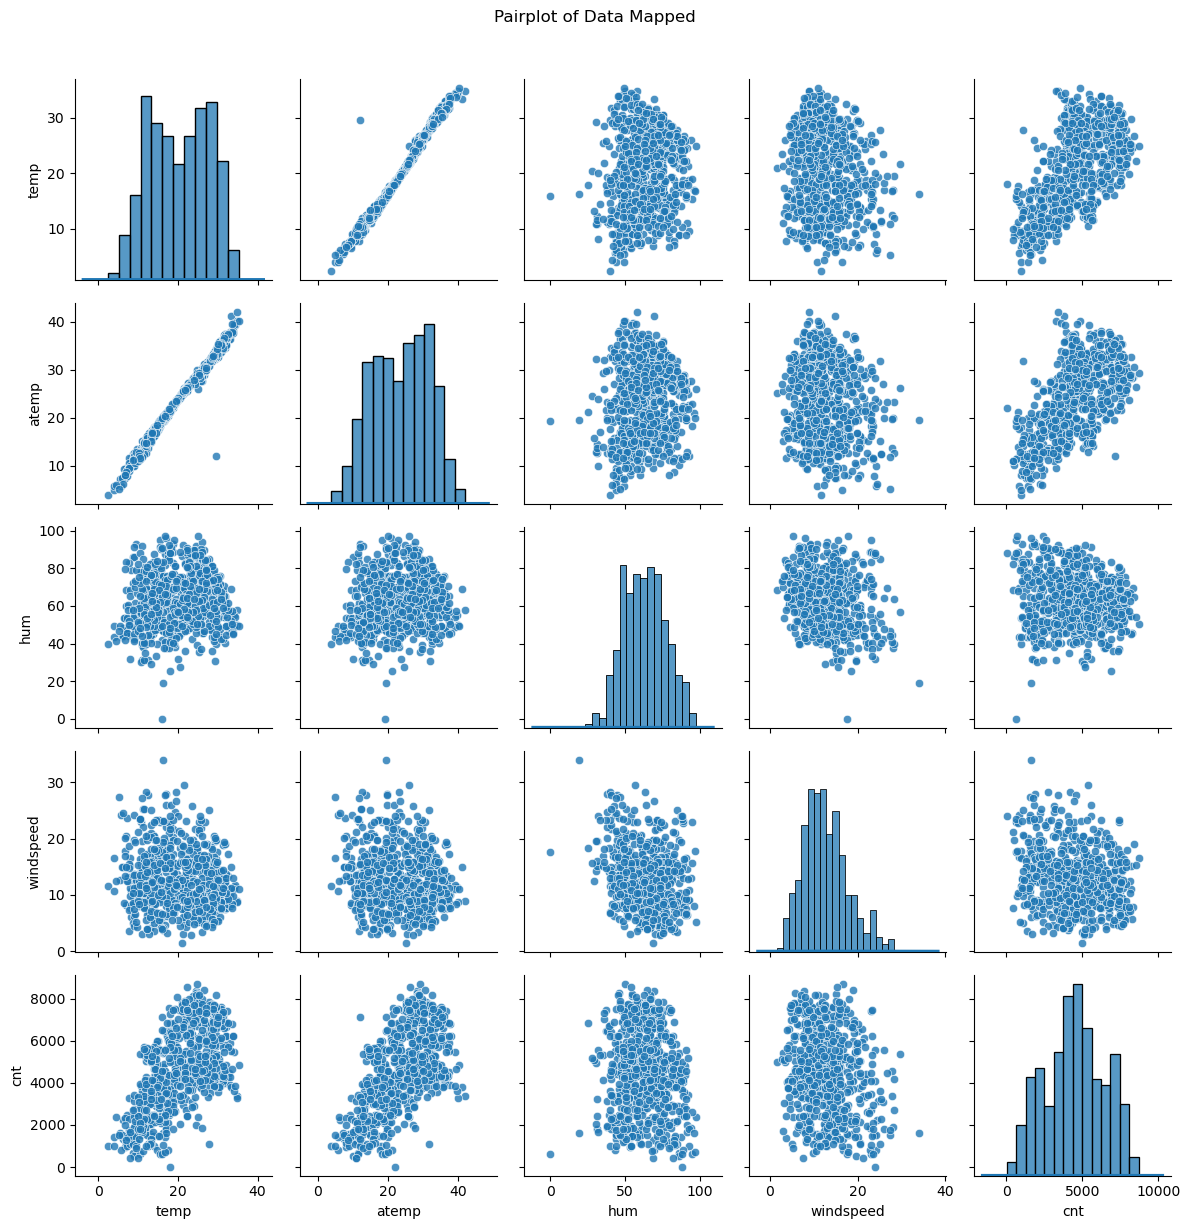

In [9]:
## Univariate Analysis for Numerical Columns

# Create pairplot
pairplot = sns.pairplot(
    data_mapped, 
    palette='husl',
    markers=['o', 's', 'D'],  
    plot_kws={'alpha': 0.8}  
)

# Adjust plot size
pairplot.fig.set_size_inches(12, 12)

# Add titles and labels (if needed)
pairplot.fig.suptitle('Pairplot of Data Mapped', y=1.02)  # Title

# Customize diagonal plots to show KDE instead of histograms
pairplot.map_diag(sns.kdeplot, lw=3)

# Adjust the layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

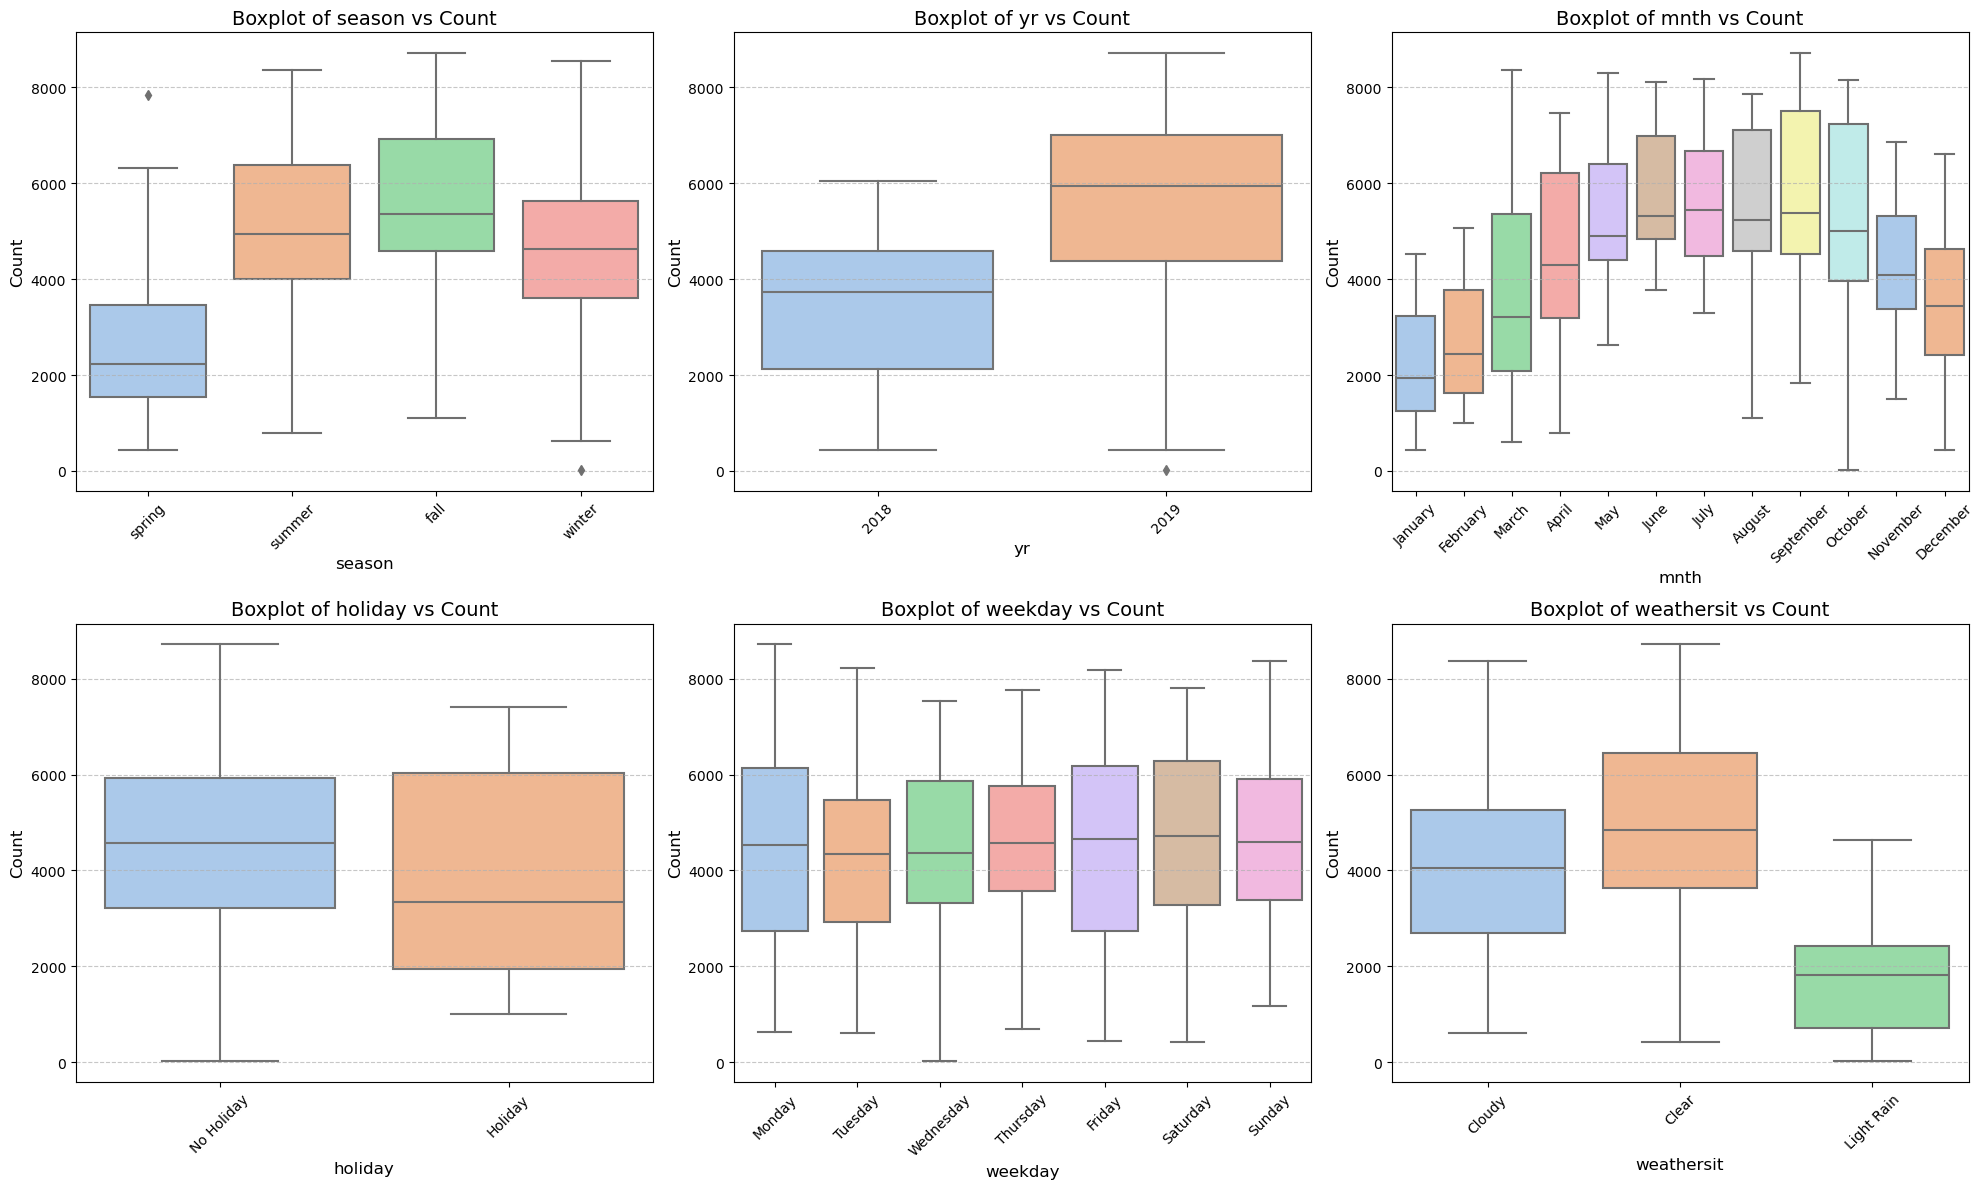

In [10]:
## Univariate Analysis for Numerical Columns

plt.figure(figsize=(20, 12))

# Define color palette
colors = sns.color_palette("pastel")

# Iterate over each categorical column
for idx, cat in enumerate(cat_cols[:6]):
    plt.subplot(2, 3, idx + 1)
    sns.boxplot(x=cat, y='cnt', data=data_mapped, palette=colors)
    
    # Set plot title
    plt.title(f'Boxplot of {cat} vs Count', fontsize=14)
    
    # Set axis labels
    plt.xlabel(cat, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Set grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and spacing
plt.tight_layout()

# Show plot
plt.show()


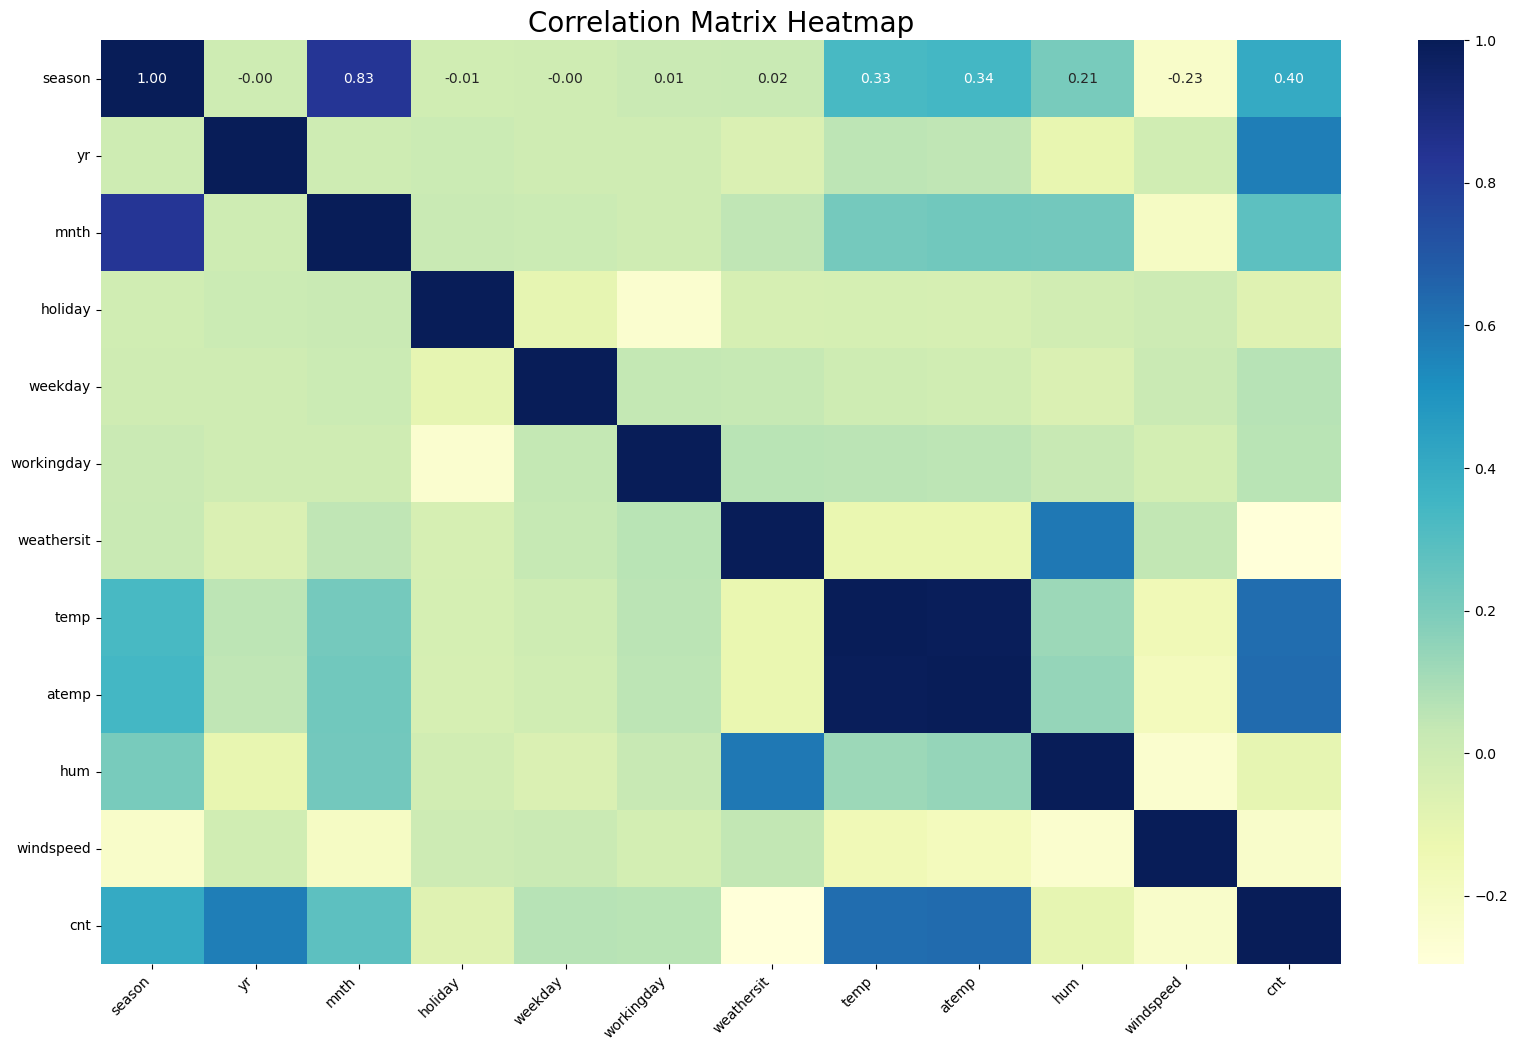

In [11]:
## Multivariate Analysis

# Create a figure with specified size
plt.figure(figsize=(20, 12))

sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt=".2f", annot_kws={"size": 10})

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Display the plot
plt.show()

In [12]:
## Preparing the data for modelling

# Creating Dummy Variables for Categorical Columns which have levels > 2.
# Here we have 'season', 'mnth', 'weekday', and 'weathersit' with more than 2 levels.

# Use pd.get_dummies to create dummy variables for these columns
# drop_first=True drops the first level to avoid dummy variable trap
data_dummies = pd.get_dummies(data, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

# Convert all data to integers to ensure consistency
data_dummies = data_dummies.astype(int)

# Display the DataFrame with dummy variables
data_dummies


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14,18,80,10,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14,17,69,16,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8,9,43,16,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,10,59,10,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9,11,43,12,1600,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10,11,65,23,2114,0,0,...,0,1,0,0,0,1,0,0,1,0
726,1,0,1,10,12,59,10,3095,0,0,...,0,1,0,0,0,0,1,0,1,0
727,1,0,0,10,12,75,8,1341,0,0,...,0,1,0,0,0,0,0,1,1,0
728,1,0,0,10,11,48,23,1796,0,0,...,0,1,0,0,0,0,0,0,0,0


Unique values for column 'season': [1 2 3 4] 3
Unique values for column 'yr': [0 1]
Unique values for column 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values for column 'holiday': [0 1]
Unique values for column 'weekday': [6 0 1 2 3 4 5]
Unique values for column 'workingday': [0 1]
Unique values for column 'weathersit': [2 1 3]

In [13]:
# Split the data into training and testing sets
# 70% of the data will be used for training and 30% for testing
df_train, df_test = train_test_split(data_dummies, train_size=0.7, random_state=100)

# Print the shape of the training and testing sets to verify the split
print(df_train.shape)
print(df_test.shape)


(510, 30)
(220, 30)


In [14]:
# keeping a copy of df_test for evaluation of a further model

df_test_1 = df_test.copy()

In [15]:
# Feature scaling using MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns in the training set
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# Display the first few rows of the scaled training set to verify the scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.242424,0.205128,0.494845,0.65625,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.333333,0.333333,0.742268,0.37500,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


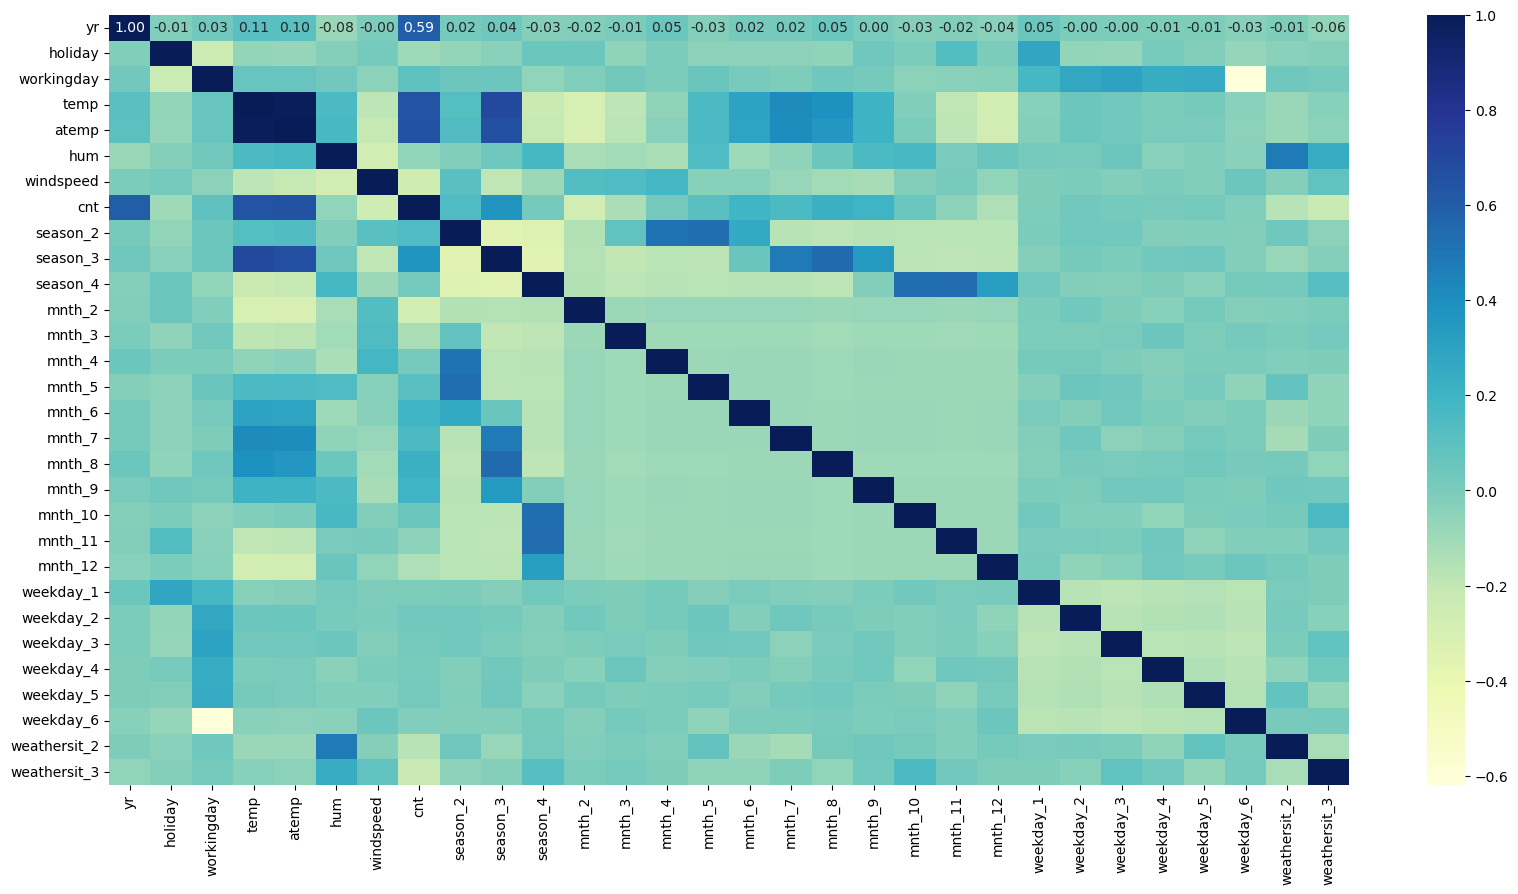

In [16]:
# Plotting a heatmap of the correlation matrix for the scaled training data
plt.figure(figsize=(20, 10))

# Create the heatmap with correlation values annotated
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu", fmt=".2f")

# Show the plot
plt.show()

In [17]:
# Separating the target variable (cnt) from the training data
y_train = df_train.pop('cnt')  # Remove 'cnt' from df_train and assign it to y_train
X_train = df_train  # Remaining data is the feature set

# Checking the shapes of the target and feature set
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [18]:
## Performing RFE to find the most optimum features for model building

# Initialize the linear regression model
lm = LinearRegression()

# Specify the number of features to select
n_features_to_select = 12  # Reducing the variable by 60%

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lm, n_features_to_select=n_features_to_select)
rfe = rfe.fit(X_train, y_train)

# Get the support and ranking of the features
support = rfe.support_
ranking = rfe.ranking_

# Print the results
best_predictors = list(zip(X_train.columns, support, ranking))

# Filter and get the names of the best predictors
best_predictors = [item[0] for item in best_predictors if item[1] == True]
print("Best predictors:", best_predictors)


Best predictors: ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_8', 'mnth_9', 'weathersit_2', 'weathersit_3']


In [19]:
# Building the first model using the best predictors

# Add a constant column to the predictors
X_train_sm = sm.add_constant(X_train[best_predictors])

# Creating the first model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Print the summary of the linear regression model
lr_model_summary = lr_model.summary()
print(lr_model_summary)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.89e-189
Time:                        20:54:37   Log-Likelihood:                 506.40
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2331      0.027      8.544   

In [20]:
# variable 'atemp' is having a high p-value of 0.490 i.e > 0.5
# Identify and address multicollinearity using Variance Inflation Factor (VIF)

# Create a DataFrame to hold the VIF values
vif = pd.DataFrame()

# Include the feature names in the VIF DataFrame
vif['Features'] = X_train_sm.columns

# Calculate VIF for each feature
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

# Round the VIF values to two decimal places for better readability
vif['VIF'] = round(vif['VIF'], 2)

# Sort the VIF DataFrame by VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF values
print(vif)


        Features    VIF
3           temp  48.48
4          atemp  47.63
0          const  46.04
5            hum   1.87
11  weathersit_2   1.56
9         mnth_8   1.47
7       season_2   1.38
8       season_4   1.33
12  weathersit_3   1.24
6      windspeed   1.22
10        mnth_9   1.21
1             yr   1.03
2        holiday   1.02


In [21]:
# VIF is also high for atemp for so drop variable atemp
# Droping 'atemp' to address multicollinearity and re-evaluate the model

# Drop 'atemp' from the predictor matrix
X_train_sm.drop(['atemp'], axis=1, inplace=True)

# Create a new linear regression model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

# Display the summary of the updated model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.93e-190
Time:                        20:54:37   Log-Likelihood:                 506.16
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     498   BIC:                            -937.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2355      0.027      8.707   

In [22]:
# Check VIF after dropping 'atemp'

# Initialize a DataFrame for VIF calculation
vif = pd.DataFrame()

# Add feature names to the DataFrame
vif['Features'] = X_train_sm.columns

# Calculate VIF for each feature
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

# Round VIF values to 2 decimal places
vif['VIF'] = round(vif['VIF'], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

# Display the DataFrame
print(vif)

        Features    VIF
0          const  45.30
4            hum   1.87
10  weathersit_2   1.55
3           temp   1.54
8         mnth_8   1.44
6       season_2   1.38
7       season_4   1.32
11  weathersit_3   1.23
9         mnth_9   1.21
5      windspeed   1.18
1             yr   1.03
2        holiday   1.02


After dropping 'atemp', the VIF for the remaining variables, which were previously dropped due to high multicollinearity, decreased significantly. This suggests an improvement in the model's multicollinearity. Therefore, we accept the updated model and proceed with residual analysis to assess the normality of the data before conducting further predictions and model analysis.

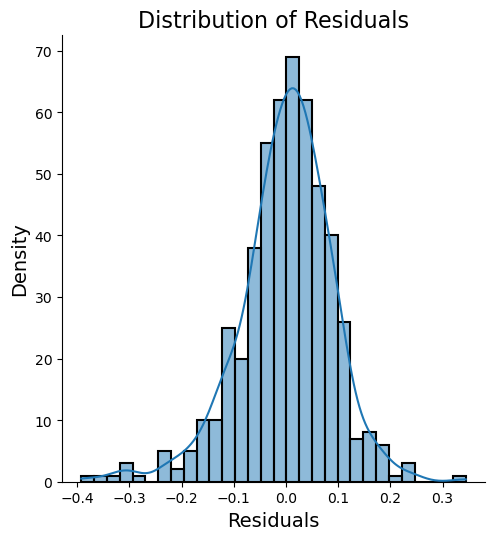

In [23]:
# Residual Analysis
# Predicting y values using the linear regression model
y_train_pred = lr_model.predict(X_train_sm)

# Calculating residuals
residuals = y_train - y_train_pred

# Creating a distribution plot of residuals
sns.displot(residuals, kde = True, linewidth = 1.5)

# Set plot title and labels
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

The distribution plot of residuals indicates normality, suggesting that our model is fitting the data well. We're now ready to proceed with prediction and evaluation.

In [24]:
# Prediction and Evaluation of Test set

# Scaling the numerical columns of the test set
df_test[num_cols] = scaler.transform(df_test[num_cols])

# Populating the target variable for the test set
y_test = df_test.pop('cnt')

# Assigning the test set to X_test
X_test = df_test

# Displaying the test set
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.818182,0.769231,0.649485,0.09375,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.909091,0.846154,0.608247,0.15625,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.515152,0.487179,0.835052,0.34375,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.878788,0.794872,0.432990,0.34375,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.818182,0.743590,0.309278,0.53125,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.515152,0.512821,0.752577,0.28125,0,0,1,...,0,1,0,1,0,0,0,0,0,0
127,0,0,0,0.575758,0.564103,0.649485,0.09375,1,0,0,...,0,0,0,0,0,0,0,0,0,0
640,1,0,1,0.727273,0.666667,0.814433,0.06250,0,0,1,...,0,0,0,0,1,0,0,0,1,0
72,0,0,1,0.333333,0.333333,0.505155,0.21875,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
# Prediction

# Selecting the best predictors and dropping 'atemp' variable
X_test = X_test[best_predictors]
X_test.drop(['atemp'], axis=1, inplace=True)

# Adding constant to the test set
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = lr_model.predict(X_test_sm)

# Calculating the R-squared score
r2_score(y_test, y_test_pred)

0.8018255110174668

# Conclusion

The model exhibits a promising performance with an R-squared value of 0.840 for the training dataset and 0.802 for the test dataset. These scores indicate that the model effectively explains a significant portion of the variance in the target variable.

However, to enhance the model's performance further, we can explore the option of removing outliers. This approach aims to refine the model's predictive accuracy by mitigating the influence of extreme data points on the regression analysis. By eliminating outliers, we can potentially achieve a more robust and reliable model, thereby improving its overall predictive capability.